In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

bs = 32
version=2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
!pip install -Uqq fastai

In [26]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/data/Cat_Classifier

/content/drive/My Drive/data/Cat_Classifier


In [35]:
data_path = "data"
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = parent_label,
                   splitter  = RandomSplitter(valid_pct=0.1,seed=42),
                   item_tfms = Resize(128))

In [36]:
dblock=dblock.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),batch_tfms=aug_transforms())
dls=dblock.dataloaders(data_path,bs=bs)
torch.save(dls,f"cat_dataloader_v{version}.pkl")

In [37]:
dls.train.vocab

['Abyssinian cat', 'Aegean cat', 'Balinese cat', 'Bengal cat', 'Birman cat', 'Bombay cat', 'British Longhair cat', 'Burmese cat', 'Burmilla cat', 'Cornish Rex cat', 'Cymric cat', 'Donskoy cat', 'Oregon Rex cat', 'Oriental Bicolor cat', 'Persian cat', 'Pixie-Bob cat', 'Ragamuffin cat', 'Siamese cat', 'Siberian cat', 'Turkish Angora cat']

In [ ]:
#dls.train.show_batch(max_n=10,nrows=2)

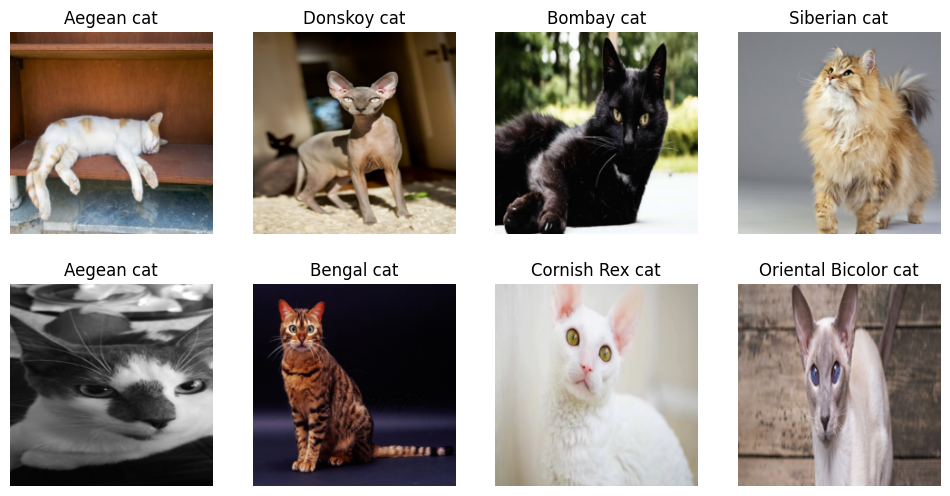

In [38]:
dls.valid.show_batch(max_n=8,nrows=2)

In [39]:
model_path="models"

In [40]:
model.load(f"CatClassifier-v{version-2}")

In [43]:
model=vision_learner(dls,resnet34,metrics=[error_rate,accuracy])

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


SuggestedLRs(slide=3.0199516913853586e-05, valley=0.001737800776027143)

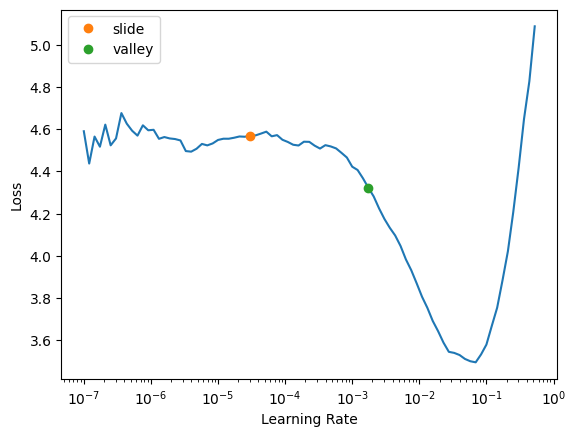

In [46]:
model.lr_find(suggest_funcs=[slide, valley])

In [50]:
model.fine_tune(12,0.001737800776027143)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only

In [51]:
model.save(f"CatClassifier-v3")

Path('models/CatClassifier-v3.pth')

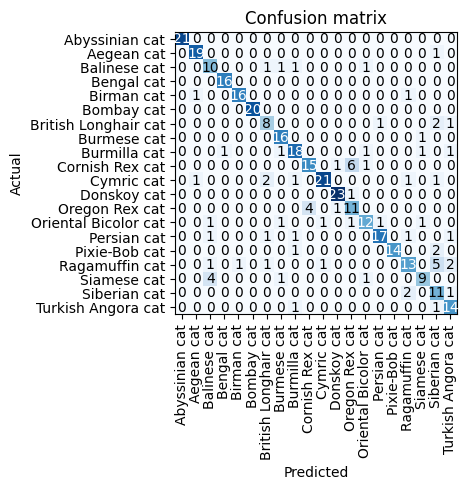

In [52]:
interp=ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

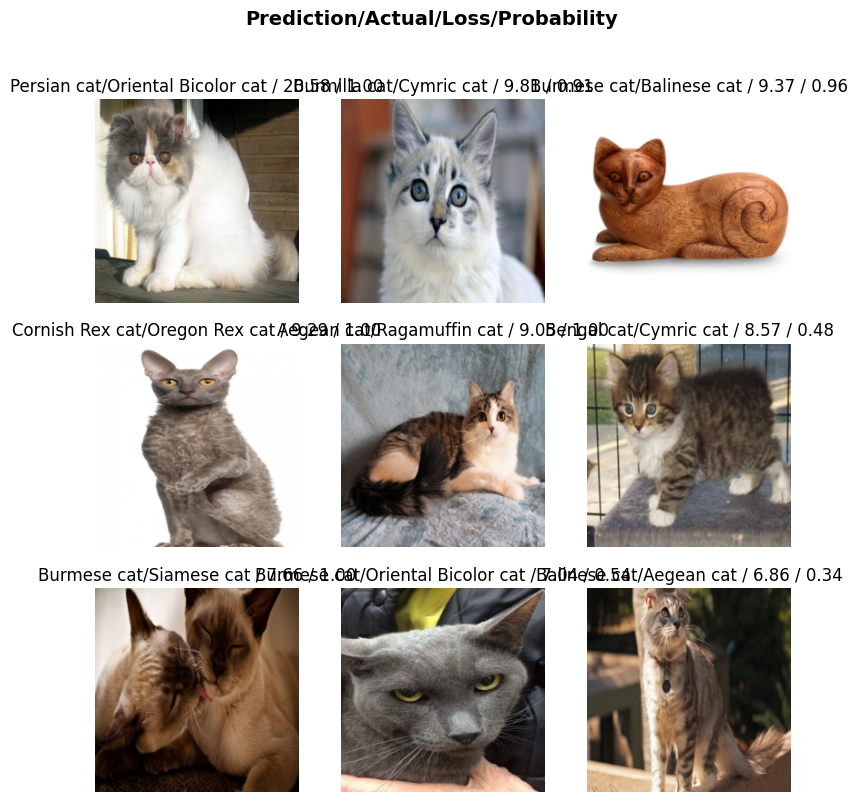

In [18]:
interp.plot_top_losses(9,nrows=3)

In [19]:
cleaner=ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
cleaner.change()

(#1) [(3, 'Persian cat')]

In [21]:
cleaner.delete()

(#0) []

In [22]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()
for idx,cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")


In [53]:
model.export(f"{model_path}/CatClassifier-v3.pkl")